<div style='text-align: center;'>
    <span style="font-size: 44px; 
                 font-weight: bold;
                 font-family: 'cursive';">LAST PROJECT PENGKOM.</span>
</div>
             
<hr style='height:3px;'>

In [687]:
# Import Modul
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import dataframe_image as dfi
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [688]:
# Read Data
df = pd.read_csv("bike_sharing.csv")

In [689]:
# Display Data

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


__Keterangan :__    
1. instant : record index
2. dteday : date (year-month-day)
3. season : season (1:springer, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. holiday : weather day is holiday or not
7. weekday : day of the week
8. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
9. weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
10. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
11. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
12. hum: Normalized humidity. The values are divided to 100 (max)
13. windspeed: Normalized wind speed. The values are divided to 67 (max)
14. casual: count of casual users
15. registered: count of registered users
16. cnt: count of total rental bikes including both casual and registered

# Analytical Description

## Data Description

In [690]:
# Informasi Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [691]:
# Pengecekan data kosong

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

__Hasil__ : Tidak ditemukan data kosong

In [692]:
# Pengecekan data duplikat (data yang sama persis)

df.duplicated().sum()

0

__Hasil :__ Tidak ditemukan data duplikat keseluruhan 

In [693]:
# Pengecekan data unik dan duplikat per kolom

for i in range(len(df.columns)):
    duplikat_count = df[df.columns[i]].to_frame().duplicated().sum()
    unik_count = df[df.columns[i]].nunique()
    print(f"{i+1}. \033[1mKOLOM {df.columns[i].upper()}\033[0m \n\tJumlah data duplikat : \033[1m{duplikat_count}\033[0m \n\tJumlah data unik : \033[1m{unik_count}\033[0m\n")

1. KOLOM INSTANT 
	Jumlah data duplikat : 0 
	Jumlah data unik : 731

2. KOLOM DTEDAY 
	Jumlah data duplikat : 0 
	Jumlah data unik : 731

3. KOLOM SEASON 
	Jumlah data duplikat : 727 
	Jumlah data unik : 4

4. KOLOM YR 
	Jumlah data duplikat : 729 
	Jumlah data unik : 2

5. KOLOM MNTH 
	Jumlah data duplikat : 719 
	Jumlah data unik : 12

6. KOLOM HOLIDAY 
	Jumlah data duplikat : 729 
	Jumlah data unik : 2

7. KOLOM WEEKDAY 
	Jumlah data duplikat : 724 
	Jumlah data unik : 7

8. KOLOM WORKINGDAY 
	Jumlah data duplikat : 729 
	Jumlah data unik : 2

9. KOLOM WEATHERSIT 
	Jumlah data duplikat : 728 
	Jumlah data unik : 3

10. KOLOM TEMP 
	Jumlah data duplikat : 232 
	Jumlah data unik : 499

11. KOLOM ATEMP 
	Jumlah data duplikat : 41 
	Jumlah data unik : 690

12. KOLOM HUM 
	Jumlah data duplikat : 136 
	Jumlah data unik : 595

13. KOLOM WINDSPEED 
	Jumlah data duplikat : 81 
	Jumlah data unik : 650

14. KOLOM CASUAL 
	Jumlah data duplikat : 125 
	Jumlah data unik : 606

15. KOLOM REGISTER

__Keterangan :__
- Jumlah data duplikat berarti banyaknya data yang sama pada kolom tersebut
- Jumlah data unik berarti banyaknya data yang berbeda pada kolom tersebut

In [694]:
# Pengecekan ukuran data

df.shape

(731, 16)

__Hasil__ : data frame berukuran 731 x 16
 - Jumlah Baris : 731
 - Jumlah Kolom : 16

In [695]:
# Pengecekan dimensi data

df.ndim

2

__Hasil__ : Dimensi data tersebut adalah 2, yaitu baris dan kolom

In [696]:
# Pengecekan tipe data

df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [697]:
# Pengecekan Jumlah Tiap Jenis Kategori

In [698]:
## Jumlah Data per Season
df['season'].value_counts().to_frame()

,count
season,
3,188
2,184
1,181
4,178


__Hasil__ :
1. Springer (1) : 181 
2. Summer (2) : 184
3. Fall (3) : 188
4. Winter (4) : 178

In [699]:
## Jumlah Data per Year

df['yr'].value_counts().to_frame()

,count
yr,
1,366
0,365


__Hasil__ :
1. 2011 (0) : 365 
2. 2012 (1) : 366

In [700]:
## Jumlah Data per Month

df['mnth'].value_counts().to_frame()

,count
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


__Hasil__ :
1. January : 62
2. February : 57
3. March : 62
4. April : 60
5. May : 62
6. June : 60
7. July : 62
8. August : 62
9. September : 60
10. October : 62
11. November : 60
10. December : 62

In [701]:
## Jumlah Data per Holiday

df['holiday'].value_counts().to_frame()

,count
holiday,
0,710
1,21


__Hasil :__
1. Not Holiday : 710
2. Holiday : 21

In [702]:
## Jumlah Data per Weekday

df['weekday'].value_counts().to_frame()

,count
weekday,
6,105
0,105
1,105
2,104
3,104
4,104
5,104


__Hasil :__

0. Monday : 105
1. Sunday : 105
2. Tuesday : 104
3. Wednesday : 104
4. Thrusday : 104
5. Friday : 104
6. Saturday : 105

In [703]:
## Jumlah Data per Working Day

df['workingday'].value_counts().to_frame()

,count
workingday,
1,500
0,231


__Hasil :__

0. Not a Working Day : 231
1. Working Day : 500

In [704]:
## Jumlah Data per Weather

df['weathersit'].value_counts().to_frame()

,count
weathersit,
1,463
2,247
3,21


__Keterangan dan Konvensi__


1: Clear, Few clouds, Partly cloudy, Partly cloudy = Categorized as __Clear__

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Categorized as __Misty__

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = Categorized as __Light Snow and Rain__

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Categorized as __Heavy Rain__

__Hasil :__
1. Clear : 463
2. Misty : 247
3. Light SnowRain : 21
4. Heavy Rain : 0

## Data Cleansing

### 1. Menghapus kolom instant karena tidak diperlukan

In [705]:
df.drop('instant', axis=1, inplace=True)

### 2. Mengubah nilai temperatur, feeling temperature, humidity, dan windspeed menjadi nilai aslinya

In [706]:
## Normalized Temperature : 
df['temp'] = df['temp']*41

## Normalized Feeling Temperature : 
df['atemp'] = df['atemp']*50

## Humidity : 
df['hum'] = df['hum']*100

## Windspeed
df['windspeed'] = df['windspeed']*67


### 3. Mengubah nama kolom agar dapat lebih mudah dibaca

In [707]:
df.rename(columns={'dteday':'Date',
                   'season':'Season',
                   'yr':'Year',
                   'mnth':'Month',
                   'holiday':'Holiday',
                   'weekday':'Weekday',
                   'workingday':'Workingday',
                   'weathersit':'Weather',
                   'temp':'Temperature',
                   'atemp':'Feeling_Temperature',
                   'hum':'Humidity',
                   'windspeed':'Windspeed', 
                   'casual':'Casual',
                   'registered':'Registered', 
                   'cnt':'Total_Count'},
         inplace=True)

# Menyimpan Data Frame Kotor

df_raw = df.copy()

In [708]:
## Data Frame Kotor

df_raw.head()

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Feeling_Temperature,Humidity,Windspeed,Casual,Registered,Total_Count
0,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 4. Merubah tipe data yang kurang sesuai

In [709]:
df.columns
# kolom dteday = date_time
df['Date'] = pd.to_datetime(df['Date'])

# kolom season (index=1) hingga weathersit (index=7)
for i in range(1, 8):
    df[df.columns[i]] = df[df.columns[i]].astype('category')

### 5. Mengubah value data kategorial menjadi string agar lebih mudah diamati

In [710]:
## Season
df['Season'].replace((1,2,3,4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True) 

## Year 
df['Year'].replace((0,1), (2011, 2012), inplace=True)

## Month
df['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                   ('January','February','March','April','May', 'June', 'July', 
                    'August', 'September', 'October',' November', 'December'),
                  inplace=True)
## Holiday
df['Holiday'].replace((0,1), ('No', 'Yes'), inplace=True)

## Weekday 
df['Weekday'].replace((0,1,2,3,4,5,6), 
                      ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday'), 
                      inplace=True)

## Working Day
df['Workingday'].replace((0,1), ('No', 'Yes'), inplace=True)

## Weather Situation
df['Weather'].replace((1,2,3,4), 
                         ('Clear','Misty','Light_SnowRain','Heavy_Rain'),
                         inplace=True)

In [711]:
# Data Frame Bersih

df.head()

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Feeling_Temperature,Humidity,Windspeed,Casual,Registered,Total_Count
0,2011-01-01,Springer,2011,January,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Springer,2011,January,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Springer,2011,January,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Springer,2011,January,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Springer,2011,January,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Analisis

## Summary Statistics

In [712]:
# Karakteristik Data

In [713]:
# Dengan menggunakan describe() kita mendapatkan informasi statistik seluruh data
# Data yang digunakan adalah data kotor (df_raw_desc) yang tipenya masih object agar dapat dilakukan perhitungan statistik

## Merubah type Date pada data kotor
df_raw['Date'] = pd.to_datetime(df['Date'])

## Deskripsi data 
df_raw_desc = df_raw.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

## Merapikan deskripsi data
df_raw_desc.rename(index={'std':'standard deviation',
                      '10%':'percentile 10%',
                      '25%':'percentile 25%',
                      '50%':'percentile 50%',
                      '75%':'percentile 75%',
                      '90%':'percentile 90%'},
               inplace=True)

## Melakukan transpose tabel

df_raw_desc = df_raw_desc.transpose()

In [714]:
# Memilah tipe data 

df_type = df.dtypes.copy()

for i in range(len(df_type)):
    if df_type[df.columns[i]] == 'datetime64[ns]':
        df_type[df.columns[i]] = 'Datetime' 
        
    elif df_type[df.columns[i]] == 'category':
        if len(df[df.columns[i]].value_counts()) < 3:
            df_type[df.columns[i]] = 'Categorical-Biner'    
        else:
            df_type[df.columns[i]] = 'Categorical-Ordinal' 

    elif df_type[df.columns[i]] == 'float64':
        df_type[df.columns[i]] = 'Quantitative-Continues' 
            
    elif df_type[df.columns[i]] == 'int64':
        df_type[df.columns[i]] = 'Quantitative-Discrete' 

df_type = df_type.to_frame().rename(columns={0:'category'})
df_type


,category
Date,Datetime
Season,Categorical-Ordinal
Year,Categorical-Biner
Month,Categorical-Ordinal
Holiday,Categorical-Biner
Weekday,Categorical-Ordinal
Workingday,Categorical-Biner
Weather,Categorical-Ordinal
Temperature,Quantitative-Continues
Feeling_Temperature,Quantitative-Continues


In [715]:
# Membuat Kolom Interval Data

def ColName(df):
    col_name = [] 
    for i in range(len(df.columns)):
        col_name.append(df.columns[i])
    return col_name

df_interval = pd.DataFrame(data=['2011/01/01 - 2012/12/31', 
                                 'Springer(1) - Winter(4)',
                                 '2011(0) - 2012(1)',
                                 'January(1) - December(12)',
                                 'No(0) - Yes(1)',
                                 'Sunday(0) - Saturday(6)',
                                 'No(0) - Yes(1)',
                                 'Clear(1) - Heavy_Rain(4)',
                                 '2 - 36',
                                 '3 - 43',
                                 '0 - 100',
                                 '1 - 35',
                                 '2 -  3410',
                                 '20 - 6946',
                                 '22 - 8714',
                                 ],index=ColName(df), columns=['interval'] )
df_interval

,interval
Date,2011/01/01 - 2012/12/31
Season,Springer(1) - Winter(4)
Year,2011(0) - 2012(1)
Month,January(1) - December(12)
Holiday,No(0) - Yes(1)
Weekday,Sunday(0) - Saturday(6)
Workingday,No(0) - Yes(1)
Weather,Clear(1) - Heavy_Rain(4)
Temperature,2 - 36
Feeling_Temperature,3 - 43


In [716]:
# Membuat Data Frame Jumlah Data Kosong

df_raw_null = df_raw.isnull().sum().to_frame().rename(columns={0:'count NaN'})
df_raw_null

,count NaN
Date,0
Season,0
Year,0
Month,0
Holiday,0
Weekday,0
Workingday,0
Weather,0
Temperature,0
Feeling_Temperature,0


In [717]:
# Membuat Data Frame Persen Data Kosong

def PersenDataNull(df_raw_null):
    persen_data = []
    for i in range(len(df_raw_null)):
        values = f'{df_raw_null.iloc[i,0]}%'
        persen_data.append(values)
    return persen_data
    
df_persen_null = pd.DataFrame(data=PersenDataNull(df_raw_null),
                                   index=ColName(df), 
                                   columns=['persen NaN'] )
df_persen_null

,persen NaN
Date,0%
Season,0%
Year,0%
Month,0%
Holiday,0%
Weekday,0%
Workingday,0%
Weather,0%
Temperature,0%
Feeling_Temperature,0%


In [718]:
# Menggabungkan Data Frame

df_statistics = pd.concat([df_raw_desc, df_interval , df_type, df_raw_null, df_persen_null], axis=1)
df_statistics

,count,mean,min,percentile 10%,percentile 25%,percentile 50%,percentile 75%,percentile 90%,max,standard deviation,interval,category,count NaN,persen NaN
Date,731,2012-01-01 00:00:00,2011-01-01 00:00:00,2011-03-15 00:00:00,2011-07-02 12:00:00,2012-01-01 00:00:00,2012-07-01 12:00:00,2012-10-19 00:00:00,2012-12-31 00:00:00,NaN,2011/01/01 - 2012/12/31,Datetime,0,0%
Season,731.0,2.49658,1.0,1.0,2.0,3.0,3.0,4.0,4.0,1.110807,Springer(1) - Winter(4),Categorical-Ordinal,0,0%
Year,731.0,0.500684,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.500342,2011(0) - 2012(1),Categorical-Biner,0,0%
Month,731.0,6.519836,1.0,2.0,4.0,7.0,10.0,11.0,12.0,3.451913,January(1) - December(12),Categorical-Ordinal,0,0%
Holiday,731.0,0.028728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.167155,No(0) - Yes(1),Categorical-Biner,0,0%
Weekday,731.0,2.997264,0.0,0.0,1.0,3.0,5.0,6.0,6.0,2.004787,Sunday(0) - Saturday(6),Categorical-Ordinal,0,0%
Workingday,731.0,0.683995,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.465233,No(0) - Yes(1),Categorical-Biner,0,0%
Weather,731.0,1.395349,1.0,1.0,1.0,1.0,2.0,2.0,3.0,0.544894,Clear(1) - Heavy_Rain(4),Categorical-Ordinal,0,0%
Temperature,731.0,20.310776,2.424346,10.66,13.820424,20.431653,26.872076,29.998347,35.328347,7.505091,2 - 36,Quantitative-Continues,0,0%
Feeling_Temperature,731.0,23.717699,3.95348,12.7523,16.892125,24.33665,30.4301,33.9019,42.0448,8.148059,3 - 43,Quantitative-Continues,0,0%


## Analysis and Visualization

In [719]:
df.head()

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Feeling_Temperature,Humidity,Windspeed,Casual,Registered,Total_Count
0,2011-01-01,Springer,2011,January,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Springer,2011,January,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Springer,2011,January,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Springer,2011,January,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Springer,2011,January,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1. Diagram Data

#### 1.1 Jumlah Data Tersedia

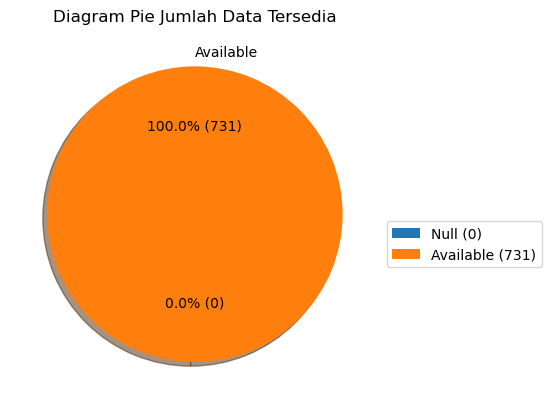

In [720]:
count_null = df.isnull().sum().sum()
count_nonull = len(df)-count_null

df_null = pd.DataFrame({'Count':[count_null, count_nonull]}, index=['Null','Available'])

# Plotting pie chart
ax = df_null['Count'].plot(kind='pie', 
                           autopct=lambda p: f"{p:.1f}% ({p*len(df)/100:.0f})", 
                           ylabel='', 
                           title='Diagram Pie Jumlah Data Tersedia', 
                           startangle=270,
                           shadow=True)

# Add custom legend
legend_labels = [f'{label} ({count})' for label, count in zip(df_null.index, df_null['Count'])]
ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

#### 1.2 Perbandingan Data Unik dan Duplikat

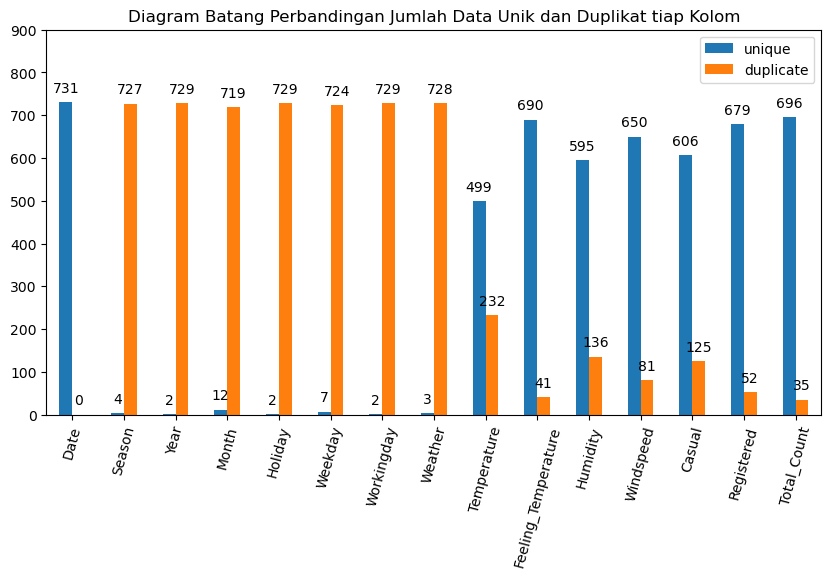

In [721]:
# Membuat data frame

## data frame data duplikat
duplikat = []
for i in range(len(df.columns)):
    duplikat_value = df[df.columns[i]].duplicated().sum()
    duplikat.append(duplikat_value)
df_duplikat = pd.DataFrame(duplikat, index=ColName(df), columns=['duplicate'])

## data frame data unique
df_unique = df.nunique().to_frame().rename(columns={0:'unique'})

## menggabungkan data frame
df_ud = pd.concat([df_unique, df_duplikat], axis=1)

# Membuat visualisasi dengan bar chart
ax = df_ud.plot(kind='bar', 
          y=['unique','duplicate'],
          rot=75, 
          figsize=(10,5), 
          ylim=(0,900),
          title='Diagram Batang Perbandingan Jumlah Data Unik dan Duplikat tiap Kolom')

# Membuat anotasi untuk menunjukkan value dari diagram bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menampilkan diagram
plt.show()

#### 1.3 Kategori Data

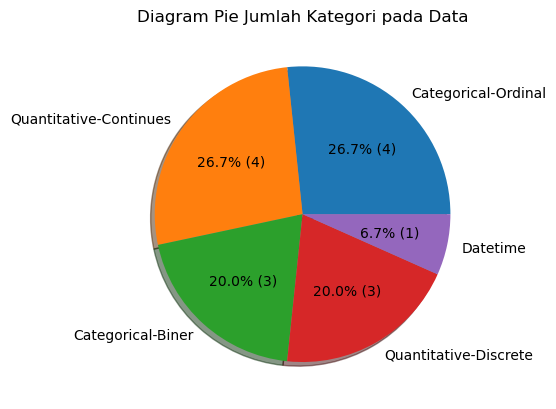

In [722]:
df_statistics['category'].value_counts().plot(kind='pie', 
                                              title='Diagram Pie Jumlah Kategori pada Data',
                                              autopct=lambda p: f'{p:.1f}% ({len(df_statistics) * p / 100:.0f})', 
                                              ylabel='', 
                                              shadow=True)

plt.show()

### 2. Distribusi Data

#### 2.1 Distribusi Total Penyewaan

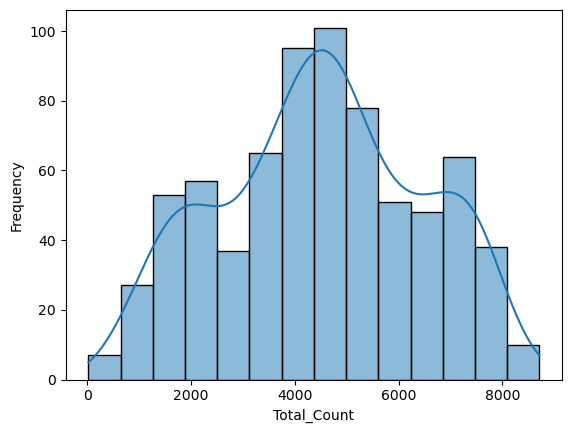

In [723]:
ax = sns.histplot(data=df['Total_Count'],edgecolor='black', kde=True)
ax.set(xlabel='Total_Count', ylabel='Frequency')

plt.show()

Berdasarkan pola distribusi data jumlah orang yang menyewa sepeda secara Casual dan Registered didapatkan bahwa :
- jumlah para penyewa harian paling berada di interval 4000-6000 orang dalam satu hari dengan frekuensi hingga 100 kali
  
Conclusion :

#### 2.2 Distribusi Penyewa Casual dan Registered 

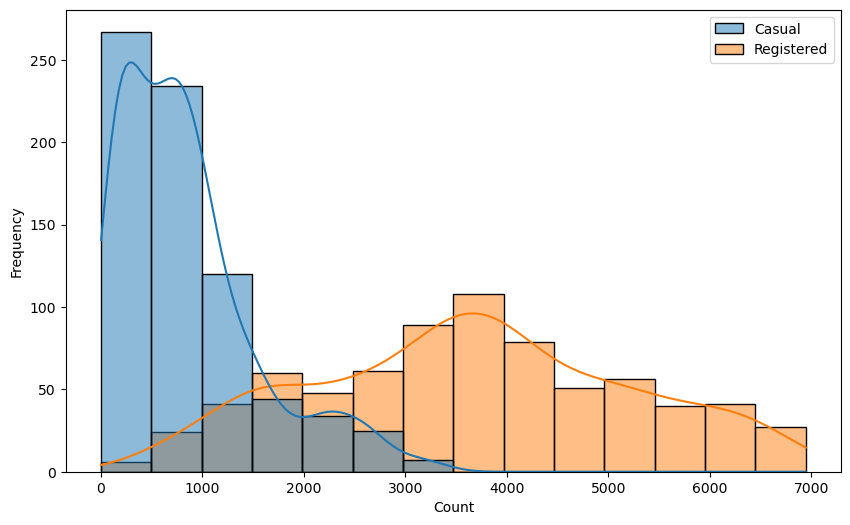

In [724]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df[['Casual', 'Registered']],color='skyblue',edgecolor='black', kde=True)
ax.set(xlabel='Count', ylabel='Frequency')

plt.show()

Berdasarkan pola distribusi data jumlah orang yang menyewa sepeda secara _Casual_ dan _Registered_ didapatkan bahwa :
1. jumlah para penyewa tanpa berlangganan cenderung berada di interval 0-1000 orang dalam satu hari dengan frekuensi hingga lebih dari 250.
2. jumlah para penyewa berlangganan cenderung berada di interval 3000-4000 orang dalam satu hari dengan frekuensi hingga kurang lebih 100.

Conclusion : 


#### 2.3 Distribusi Temperature dan Feeling Temperature

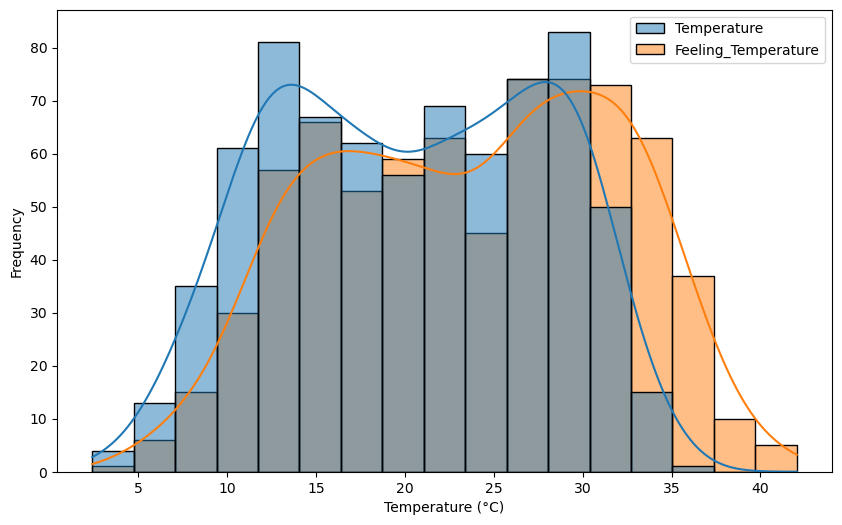

In [725]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df[['Temperature','Feeling_Temperature']],edgecolor='black', kde=True)
ax.set(xlabel='Temperature (°C)', ylabel='Frequency')

plt.show()

Berdasarkan pola distribusi data temperatur dan feeling temperature didapatkan bahwa :
1. jumlah temperatur harian paling sering berkisar pada 10-15 &deg;C dan 25-30 &deg;C
2. jumlah feeling temperature harian paling sering berkisar pada 15 &deg;C dan 25-30 &deg;C

Conclusion : 


#### 2.4 Distribusi Kelembapan

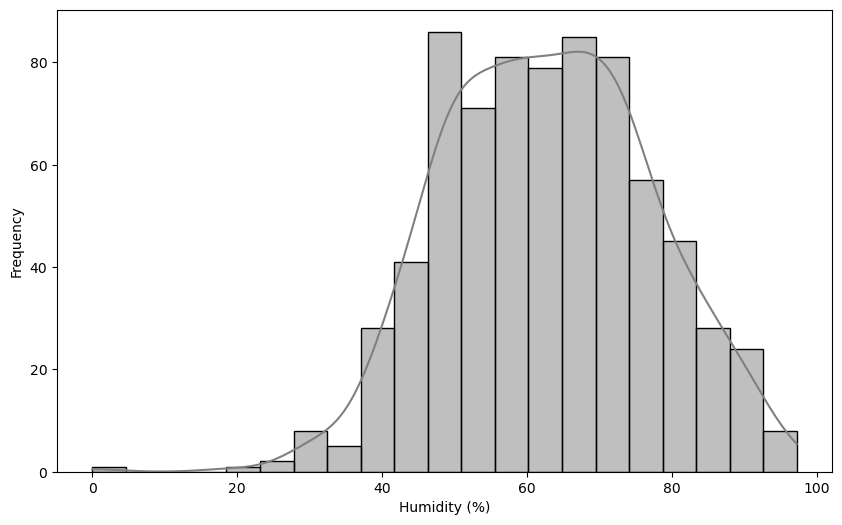

In [726]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df['Humidity'], color='gray',edgecolor='black', kde=True)
ax.set(xlabel='Humidity (%)', ylabel='Frequency')

plt.show()

#### 2.5 Distribusi Kecepatan Angin

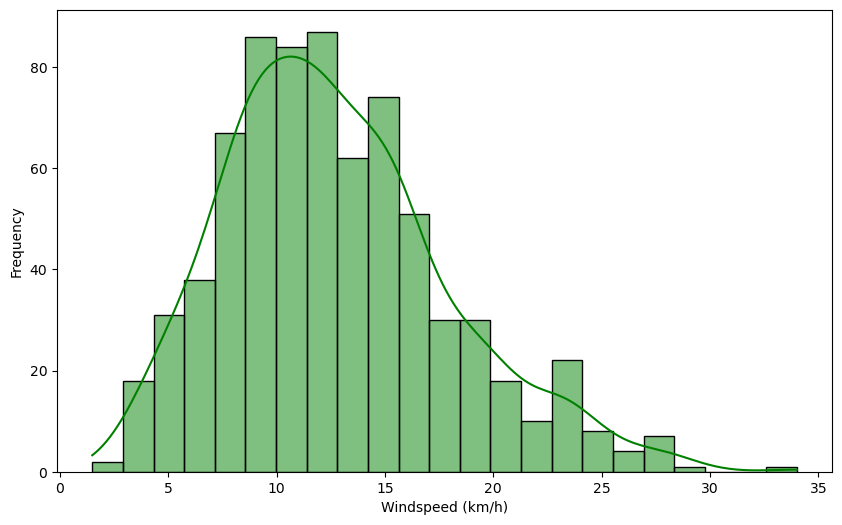

In [727]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df['Windspeed'], color='green',edgecolor='black', kde=True)
ax.set(xlabel='Windspeed (km/h)', ylabel='Frequency')

plt.show()

### 3. Hubungan Data Terhadap Waktu

In [728]:
df.head()

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Feeling_Temperature,Humidity,Windspeed,Casual,Registered,Total_Count
0,2011-01-01,Springer,2011,January,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Springer,2011,January,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Springer,2011,January,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Springer,2011,January,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Springer,2011,January,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### 3.1 Data Penyewa

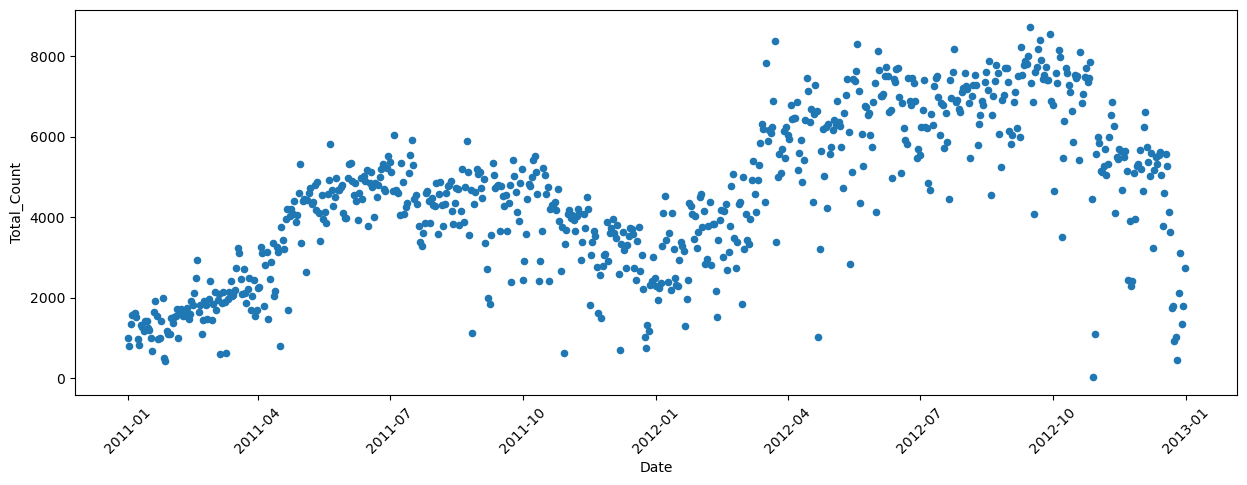

In [729]:
# Sampel data tahun 2011

df_2011=df.copy()
df_2011.plot(kind='scatter', x='Date', y='Total_Count', rot=45, figsize=(15,5))

plt.show()

In [730]:
# Melakukan Regresi Linear

def LinRegression(x_cpy,y):
    lr = LinearRegression()
    lr.fit(x_cpy,y)
    
    y_pred = pd.Series(lr.predict(x_cpy))
    return y_pred

def RegGraph(**kwargs):
    df_reg = df.copy()
    
    years = kwargs['years']
    subject = kwargs['subject']
    if years == 'all':
        x = df_reg.index.values
        y = df_reg.loc[:, subject]
    else:
        x = df_reg[df['Year'] == int(years)].reset_index().index.values
        y = df_reg.loc[df['Year'] == int(years), subject]
        
    x_cpy = pd.Series(x)
    x_cpy = np.array(x).reshape(-1,1)

    y_pred = LinRegression(x_cpy,y)

    return x, y, y_pred 

def AnnotationDay(**kwargs):
    years = kwargs['years']
    subject = kwargs['subject']

    if years == 'all':
        max_index = df[subject].idxmax()
        max_value = df[subject].max()

        min_index = df[subject].idxmin()
        min_value = df[subject].min()
        
    else:
        max_index = df.loc[df['Year'] == int(years)][subject].idxmax()
        max_value = df.loc[df['Year'] == int(years)][subject].max()
        
        min_index = df.loc[df['Year'] == int(years)][subject].idxmin()
        min_value = df.loc[df['Year'] == int(years)][subject].min()
    return max_value, max_index, min_value, min_index

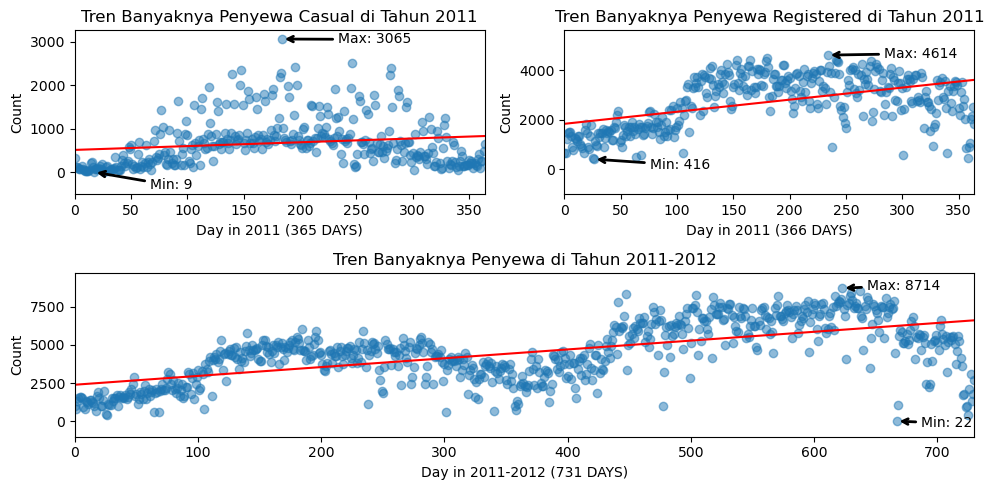

In [731]:
x1, y1, y_pred1= RegGraph(years='2011', subject='Casual')
x2, y2, y_pred2= RegGraph(years='2011', subject='Registered')
x3, y3, y_pred3= RegGraph(years='all', subject='Total_Count')

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,5))

gs = ax[1, 0].get_gridspec()
for axes in ax[1,:]:
    axes.remove()

ax_all = fig.add_subplot(gs[1,:])

# Grafik untuk data penyewa casual di tahun 2011
ax[0,0].set_xlim(0, x1.max())
ax[0,0].set_ylim(-500, y1.max()+200)
ax[0,0].set_xlabel('Day in 2011 (365 DAYS)')
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('Tren Banyaknya Penyewa Casual di Tahun 2011')

ax[0,0].scatter(x = x1, y = y1, alpha=0.5)
ax[0,0].plot(y_pred1, color='r')

# Anotasi
max_value, max_index, min_value, min_index = AnnotationDay(years='2011', subject='Casual')

ax[0,0].annotate(f'Max: {max_value}', xy=(max_index, max_value),
                xytext=(max_index+50, max_value-100),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax[0,0].annotate(f'Min: {min_value}', xy=(min_index, min_value),
                xytext=(min_index+50, min_value-400),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

# Grafik untuk data penyewa registered di tahun 2011
ax[0,1].set_xlim(0, x2.max())
ax[0,1].set_ylim(-1000, y2.max()+1000)
ax[0,1].set_xlabel('Day in 2011 (366 DAYS)')
ax[0,1].set_ylabel('Count')
ax[0,1].set_title('Tren Banyaknya Penyewa Registered di Tahun 2011')

ax[0,1].scatter(x = x2, y = y2, alpha=0.5)
ax[0,1].plot(y_pred2, color='r')

# Anotasi
max_value, max_index, min_value, min_index = AnnotationDay(years='2011', subject='Registered')

ax[0,1].annotate(f'Max: {max_value}', xy=(max_index, max_value),
                xytext=(max_index+50, max_value-100),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax[0,1].annotate(f'Min: {min_value}', xy=(min_index, min_value),
                xytext=(min_index+50, min_value-400),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

# Grafik untuk data seluruh hari terhadap total penyewa per hari
ax_all.set_xlim(0, x3.max())
ax_all.set_ylim(-1000, y3.max()+1000)
ax_all.set_xlabel('Day in 2011-2012 (731 DAYS)')
ax_all.set_ylabel('Count')
ax_all.set_title('Tren Banyaknya Penyewa di Tahun 2011-2012')

ax_all.scatter(x = x3, y = y3, alpha=0.5)
ax_all.plot(y_pred3, color='r')

# Anotasi
max_value, max_index, min_value, min_index = AnnotationDay(years='all', subject='Total_Count')
ax_all.annotate(f'Max: {max_value}', xy=(max_index, max_value),
                xytext=(max_index+20, max_value-100),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax_all.annotate(f'Min: {min_value}', xy=(min_index, min_value),
                xytext=(min_index+20, min_value-400),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

fig.tight_layout()

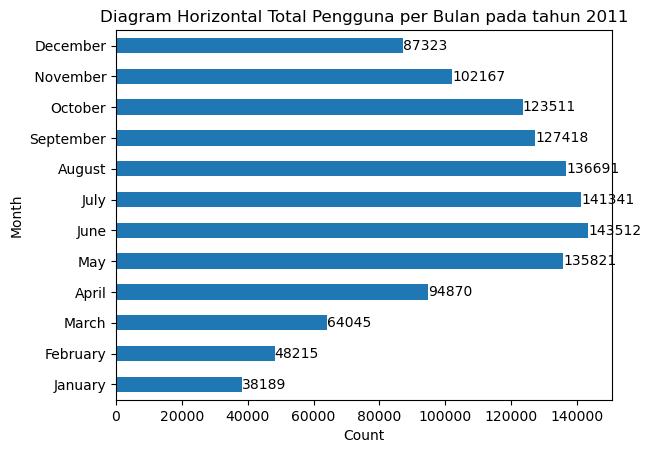

In [732]:
## Data Perbulan di tahun 2011
df_total_month = df.loc[df['Year'] == 2011].groupby(['Month'])['Total_Count'].sum()
ax = df_total_month.plot(kind='barh', xlabel = 'Count', title='Diagram Horizontal Total Pengguna per Bulan pada tahun 2011')

## Annotation
for index, value in enumerate(df_total_month):
    ax.text(value, index, str(value), ha='left', va='center')

## Show the Graph
plt.show()

#### 3.2 Data Temperatur

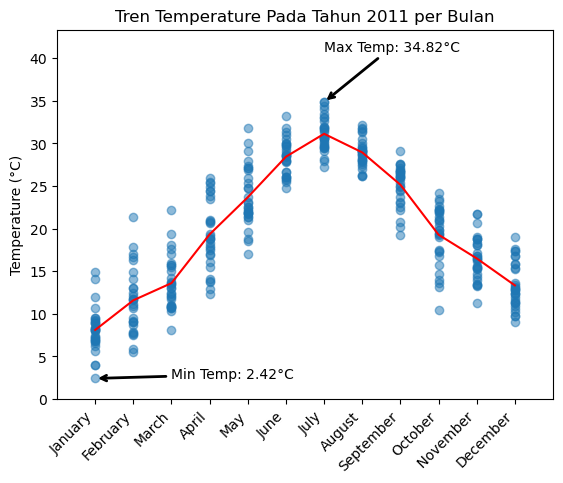

In [733]:
# Sampel data temperatur 2011
df_temp_2011 = df.loc[df['Year'] == 2011].groupby(['Month'])['Temperature'].mean()

fig, ax = plt.subplots()

ax.set_ylim(0, df['Temperature'].max() + 8)
ax.set_xlim(-1,12)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('')

ax.plot(df_temp_2011, color='r')
ax.scatter(x = df.loc[df['Year'] == 2011]['Month'], y = df.loc[df['Year'] == 2011]['Temperature'], alpha=0.5)

ax.set_xticklabels(df_temp_2011.index,rotation=45, ha='right')
ax.set_title('Tren Temperature Pada Tahun 2011 per Bulan')

max_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Temperature'].idxmax()
max_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Temperature'].max()

min_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Temperature'].idxmin()
min_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Temperature'].min()

ax.annotate(f'Max Temp: {max_temp_value:.2f}°C', xy=(max_temp_index, max_temp_value),
            xytext=(max_temp_index, max_temp_value + 6),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax.annotate(f'Min Temp: {min_temp_value:.2f}°C', xy=(min_temp_index, min_temp_value),
            xytext=('March', min_temp_value),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

plt.show()

#### 3.3 Data Kelembapan 

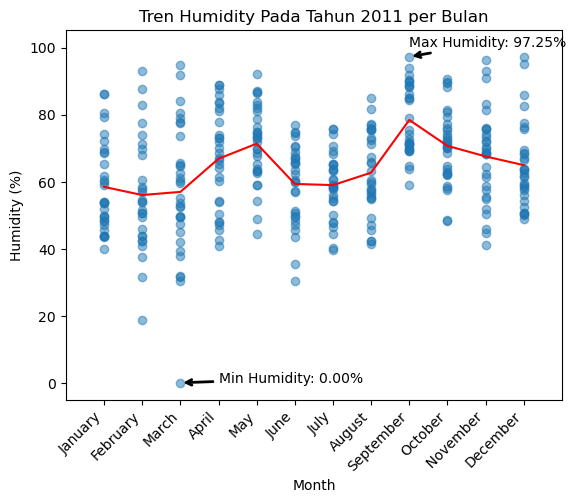

In [734]:
# Sampel data kelembapan 2011
df_humid_2011 = df.loc[df['Year'] == 2011].groupby(['Month'])['Humidity'].mean()

fig, ax = plt.subplots()

ax.set_ylim(-5, df['Humidity'].max() + 8)
ax.set_xlim(-1,12)
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Month')

ax.plot(df_humid_2011, color='r')
ax.scatter(x = df.loc[df['Year'] == 2011]['Month'], y = df.loc[df['Year'] == 2011]['Humidity'], alpha=0.5)

ax.set_xticklabels(df_temp_2011.index,rotation=45, ha='right')
ax.set_title('Tren Humidity Pada Tahun 2011 per Bulan')

max_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Humidity'].idxmax()
max_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Humidity'].max()

min_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Humidity'].idxmin()
min_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Humidity'].min()

ax.annotate(f'Max Humidity: {max_temp_value:.2f}%', xy=(max_temp_index, max_temp_value),
            xytext=(max_temp_index, max_temp_value + 3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax.annotate(f'Min Humidity: {min_temp_value:.2f}%', xy=(min_temp_index, min_temp_value),
            xytext=('April', min_temp_value),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

plt.show()

In [735]:
# Cek tanggal ketika kelembapan 0%

imin = df['Humidity'].idxmin()
df.loc[imin:imin]

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Feeling_Temperature,Humidity,Windspeed,Casual,Registered,Total_Count
68,2011-03-10,Springer,2011,March,No,Thrusday,Yes,Light_SnowRain,15.952731,19.2834,0.0,17.545759,46,577,623


Data kelembapan pada tanggal tersebut __tidak valid__ sehingga dapat __diabaikan__ karena uap air akan selalu ada di udara walau sekecil apapun sehingga tidak mungkin kelembapan 0%

#### 3.4  Data Kecepatan Angin

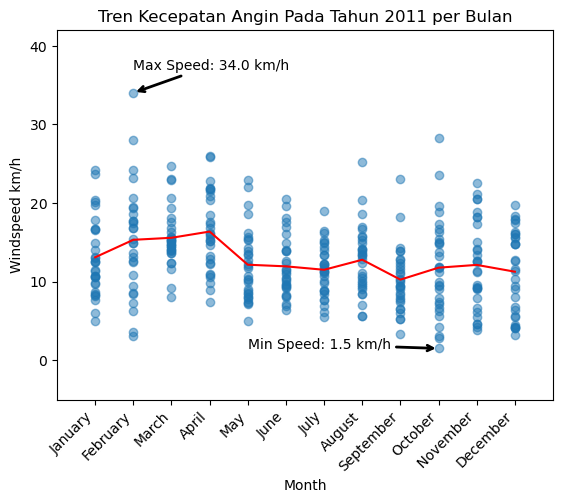

In [736]:
# Sampel data kecepatan angin 2011
df_wind_2011 = df.loc[df['Year'] == 2011].groupby(['Month'])['Windspeed'].mean()

fig, ax = plt.subplots()

ax.set_ylim(-5, df['Windspeed'].max() + 8)
ax.set_xlim(-1,12)
ax.set_ylabel('Windspeed km/h')
ax.set_xlabel('Month')

ax.plot(df_wind_2011, color='r')
ax.scatter(x = df.loc[df['Year'] == 2011]['Month'], y = df.loc[df['Year'] == 2011]['Windspeed'], alpha=0.5)

ax.set_xticklabels(df_temp_2011.index,rotation=45, ha='right')
ax.set_title('Tren Kecepatan Angin Pada Tahun 2011 per Bulan')

max_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Windspeed'].idxmax()
max_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Windspeed'].max()

min_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Windspeed'].idxmin()
min_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Windspeed'].min()

ax.annotate(f'Max Speed: {max_temp_value:.1f} km/h', xy=(max_temp_index, max_temp_value),
            xytext=(max_temp_index, max_temp_value + 3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax.annotate(f'Min Speed: {min_temp_value:.1f} km/h', xy=(min_temp_index, min_temp_value),
            xytext=('May', min_temp_value),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

plt.show()

### 4 Korelasi Antar Data